In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv("multi_omics_study_data - Sheet1.csv")

In [6]:
df

,PatientID,Age,Gender,Condition,GeneA_Expression,GeneB_Expression,GeneC_Expression,ProteinA_Level,ProteinB_Level,MetaboliteA_Level,MetaboliteB_Level,Outcome
0,1,45,M,Control,5.1,4.8,6.2,120,80,1.2,0.80,5.1
1,2,50,F,Control,5.5,5.0,6.5,130,85,1.4,0.90,4.8
2,3,36,M,Control,5.7,5.2,6.7,125,82,1.3,0.85,5.5
3,4,62,F,Control,5.9,5.3,6.9,135,87,1.5,0.95,5.0
4,5,28,M,Control,6.1,5.5,7.0,140,90,1.6,1.00,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,51,F,Treatment,5.9,5.8,7.2,150,95,2.1,1.50,6.6
146,147,46,M,Treatment,5.7,5.5,6.9,145,91,1.8,1.20,6.2
147,148,48,F,Treatment,5.8,5.7,7.0,150,93,2.0,1.40,6.5
148,149,53,M,Treatment,5.9,5.7,7.1,150,94,2.0,1.40,6.5


In [8]:
  # Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (150, 12)

First few rows:
   PatientID  Age Gender Condition  GeneA_Expression  GeneB_Expression  \
0          1   45      M   Control               5.1               4.8   
1          2   50      F   Control               5.5               5.0   
2          3   36      M   Control               5.7               5.2   
3          4   62      F   Control               5.9               5.3   
4          5   28      M   Control               6.1               5.5   

   GeneC_Expression  ProteinA_Level  ProteinB_Level  MetaboliteA_Level  \
0               6.2             120              80                1.2   
1               6.5             130              85                1.4   
2               6.7             125              82                1.3   
3               6.9             135              87                1.5   
4               7.0             140              90                1.6   

   MetaboliteB_Level  Outcome  
0               0.80      5.1  
1   

In [10]:
print("\nGender Distribution:")
print(df['Gender'].value_counts())
print("\nCondition Distribution:")
print(df['Condition'].value_counts())


Gender Distribution:
Gender
M    75
F    75
Name: count, dtype: int64

Condition Distribution:
Condition
Treatment    130
Control       20
Name: count, dtype: int64


In [14]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
PatientID            0
Age                  0
Gender               0
Condition            0
GeneA_Expression     0
GeneB_Expression     0
GeneC_Expression     0
ProteinA_Level       0
ProteinB_Level       0
MetaboliteA_Level    0
MetaboliteB_Level    0
Outcome              0
dtype: int64


In [15]:
scaler = StandardScaler()
omics_columns = [col for col in df.columns if any(x in col for x in ['Gene', 'Protein', 'Metabolite'])]
df[omics_columns] = scaler.fit_transform(df[omics_columns])

In [16]:
df

,PatientID,Age,Gender,Condition,GeneA_Expression,GeneB_Expression,GeneC_Expression,ProteinA_Level,ProteinB_Level,MetaboliteA_Level,MetaboliteB_Level,Outcome
0,1,45,M,Control,-3.658944,-3.377743,-2.989453,-3.481685,-3.655577,-3.472082,-3.159759,5.1
1,2,50,F,Control,-1.459178,-2.411754,-1.669282,-2.058653,-2.097803,-2.419936,-2.510493,4.8
2,3,36,M,Control,-0.359295,-1.445764,-0.789169,-2.770169,-3.032467,-2.946009,-2.835126,5.5
3,4,62,F,Control,0.740588,-0.962770,0.090945,-1.347137,-1.474693,-1.893863,-2.185860,5.0
4,5,28,M,Control,1.840471,0.003220,0.531002,-0.635621,-0.540028,-1.367790,-1.861228,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,51,F,Treatment,0.740588,1.452204,1.411116,0.787411,1.017746,1.262575,1.385100,6.6
146,147,46,M,Treatment,-0.359295,0.003220,0.090945,0.075895,-0.228474,-0.315644,-0.562697,6.2
147,148,48,F,Treatment,0.190646,0.969209,0.531002,0.787411,0.394636,0.736502,0.735834,6.5
148,149,53,M,Treatment,0.740588,0.969209,0.971059,0.787411,0.706191,0.736502,0.735834,6.5


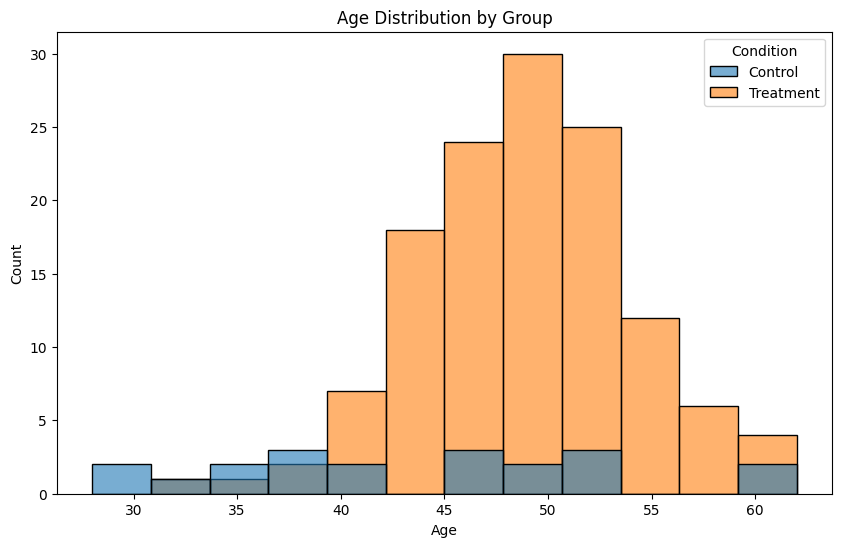

In [18]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Condition', multiple="layer", alpha=0.6)
plt.title('Age Distribution by Group')
plt.show()
    

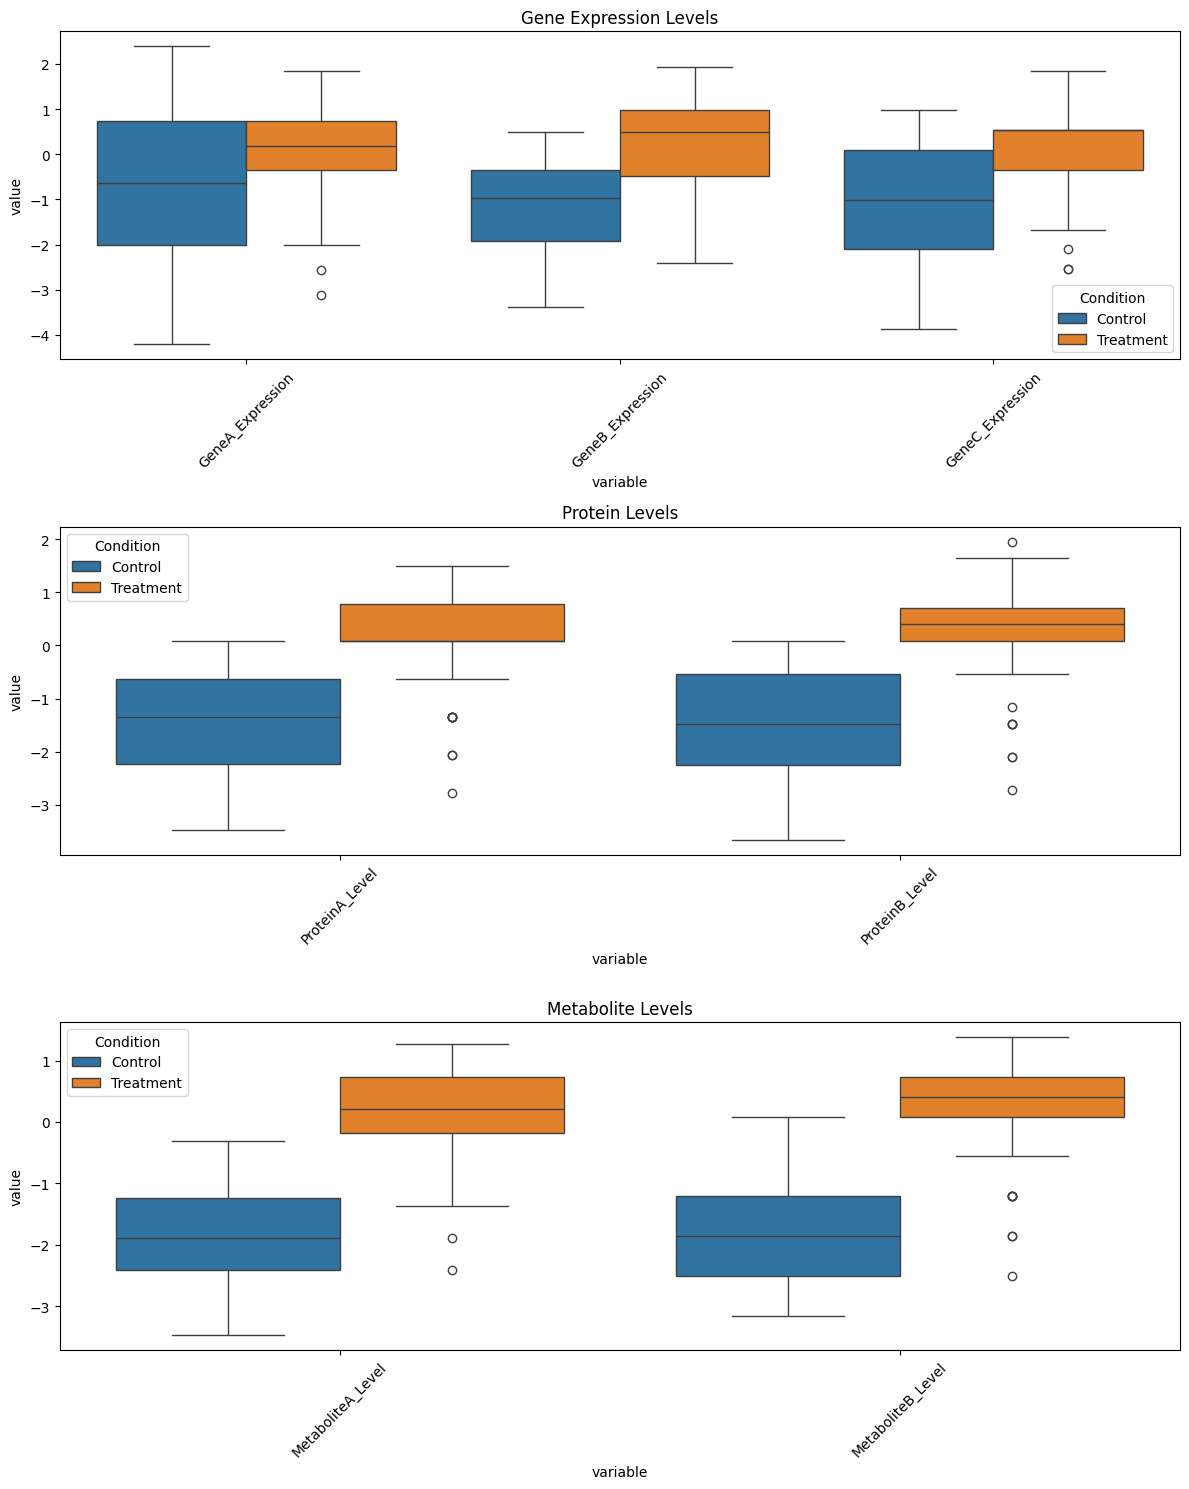

In [22]:
gene_cols = [col for col in df.columns if 'Gene' in col]
protein_cols = [col for col in df.columns if 'Protein' in col]
metabolite_cols = [col for col in df.columns if 'Metabolite' in col]
    
    # Create box plots for each type of data
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
    
for cols, ax, title in zip(
   [gene_cols, protein_cols, metabolite_cols],
        axes,
        ['Gene Expression Levels', 'Protein Levels', 'Metabolite Levels']
    ):
        df_melted = pd.melt(df, id_vars=['Condition'], value_vars=cols)
        sns.boxplot(data=df_melted, x='variable'
                    , y='value', hue='Condition', ax=ax)
        ax.set_title(title)
        ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

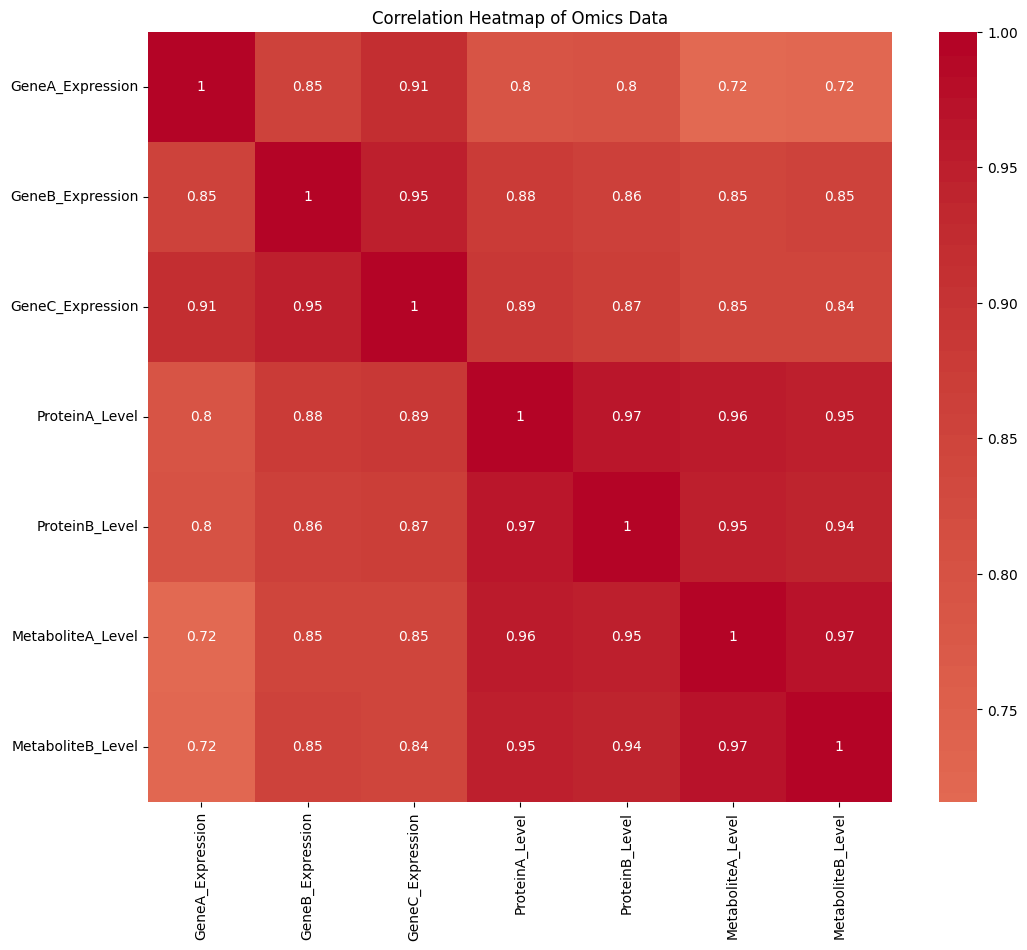

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

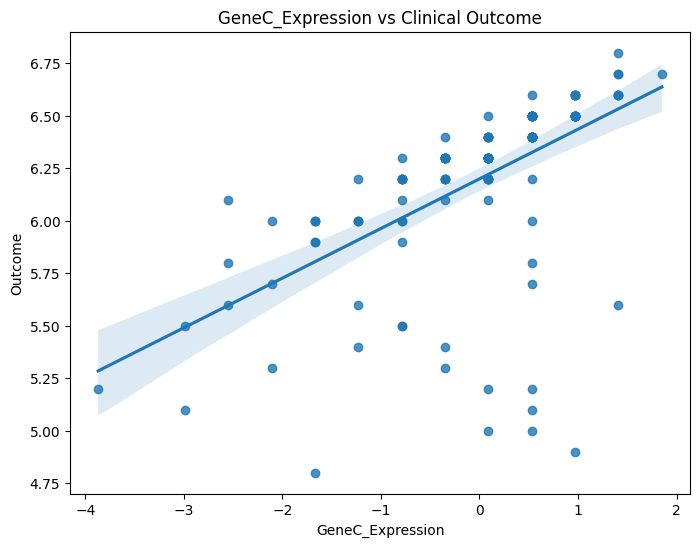

In [24]:
   # Correlation Heatmap
omics_data = df[omics_columns]
plt.figure(figsize=(12, 10))
sns.heatmap(omics_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Omics Data')
plt.show()
    
# Scatter plots with regression lines
for gene in gene_cols:
    plt.figure(figsize=(8, 6))
sns.regplot(data=df, x=gene, y='Outcome')
plt.title(f'{gene} vs Clinical Outcome')
plt.show()



In [29]:

    
# T-tests between control and treatment groups
omics_columns = [col for col in df.columns if any(x in col for x in ['Gene', 'Protein', 'Metabolite'])]
results={}    
print("T-test Results:")
for col in omics_columns:
        control_data = df[df['Condition'] == 'control'][col]
        treatment_data = df[df['Condition'] == 'treatment'][col]
        t_stat, p_val = stats.ttest_ind(control_data, treatment_data)
        results[f't_test_{col}'] = {'t_statistic': t_stat, 'p_value': p_val}
        print(f"{col}: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")
    

T-test Results:
GeneA_Expression: t-statistic = nan, p-value = nan
GeneB_Expression: t-statistic = nan, p-value = nan
GeneC_Expression: t-statistic = nan, p-value = nan
ProteinA_Level: t-statistic = nan, p-value = nan
ProteinB_Level: t-statistic = nan, p-value = nan
MetaboliteA_Level: t-statistic = nan, p-value = nan
MetaboliteB_Level: t-statistic = nan, p-value = nan


/var/folders/jb/tm9nnps15vq9957p_1j8265h0000gn/T/ipykernel_5405/3603635880.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = stats.ttest_ind(control_data, treatment_data)


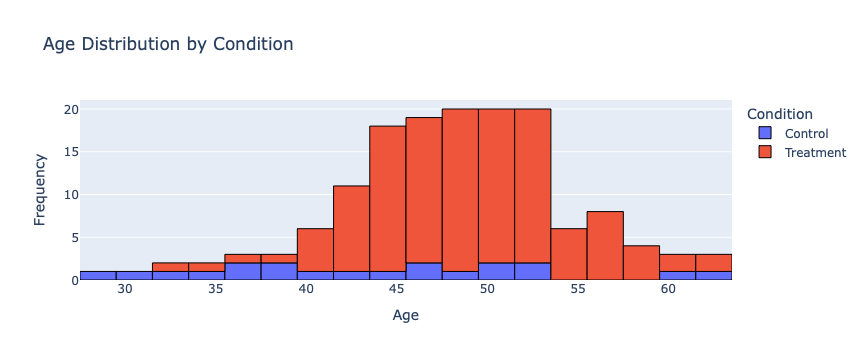

In [34]:
import plotly.express as px
fig = px.histogram(
    df, 
    x='Age', 
    color='Condition', 
    title='Age Distribution by Condition',
    labels={'Age': 'Age', 'Condition': 'Condition'} # Overlapping histograms for comparison
)


# Customize the outline and appearance of bars
fig.update_traces(
    marker=dict(line=dict(color='black', width=1))  # Add black outline to bars
)
# Customize layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Frequency'
)

fig.show()

In [36]:
gene_cols = [col for col in df.columns if 'Gene' in col]
protein_cols = [col for col in df.columns if 'Protein' in col]
metabolite_cols = [col for col in df.columns if 'Metabolite' in col]
print(gene_cols )

['GeneA_Expression', 'GeneB_Expression', 'GeneC_Expression']


In [39]:

gene_cols = [col for col in df.columns if 'Gene' in col]
protein_cols = [col for col in df.columns if 'Protein' in col]
metabolite_cols = [col for col in df.columns if 'Metabolite' in col]

for cols, ax, title in zip(
   [gene_cols, protein_cols, metabolite_cols],
        axes,
        ['Gene Expression Levels', 'Protein Levels', 'Metabolite Levels']
    ):
        df_melted = pd.melt(df, id_vars=['Condition'], value_vars=cols)

print(df_melted)

     Condition           variable     value
0      Control  MetaboliteA_Level -3.472082
1      Control  MetaboliteA_Level -2.419936
2      Control  MetaboliteA_Level -2.946009
3      Control  MetaboliteA_Level -1.893863
4      Control  MetaboliteA_Level -1.367790
..         ...                ...       ...
295  Treatment  MetaboliteB_Level  1.385100
296  Treatment  MetaboliteB_Level -0.562697
297  Treatment  MetaboliteB_Level  0.735834
298  Treatment  MetaboliteB_Level  0.735834
299  Treatment  MetaboliteB_Level  0.735834

[300 rows x 3 columns]


In [41]:
 correlation_matrix = df[omics_columns + ['Outcome']].corr()
print("\nCorrelation with Outcome:")
print(correlation_matrix['Outcome'].sort_values(ascending=False))


Correlation with Outcome:
Outcome              1.000000
MetaboliteA_Level    0.821541
MetaboliteB_Level    0.794636
ProteinA_Level       0.712760
ProteinB_Level       0.710758
GeneB_Expression     0.624513
GeneC_Expression     0.572977
GeneA_Expression     0.360260
Name: Outcome, dtype: float64


In [44]:
   # Multiple Linear Regression
!pip install statsmodels
import statsmodels.api as sm
X = df[omics_columns]
y = df['Outcome']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nRegression Results:")
print(model.summary())
    

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 12.2 MB/s eta 0:00:00 0:00:01

Regression Results:
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     84.26
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           2.20e-47
Time:                        15:48:14   Log-Likelihood:                 42.975
No. Observations:                 150   AIC:                            -69.95
Df Residuals:                     142   BIC:                            -45.86
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [45]:
    
    # ANOVA
    f_stat, p_val = stats.f_oneway(*[group['Outcome'].values 
                                    for name, group in df.groupby('Condition')])
    print("\nANOVA Results:")
    print(f"F-statistic: {f_stat:.3f}")
    print(f"p-value: {p_val:.3f}")
    


ANOVA Results:
F-statistic: 369.725
p-value: 0.000
